<a href="https://colab.research.google.com/github/Gw0496/gazoubunrui/blob/master/face_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

%matplotlib inline


import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
from keras.preprocessing.image import array_to_img,img_to_array,load_img
import numpy as np
import os


X_train=[]
Y_train=[]

X_test=[]
Y_test=[]

Mydribe = "/content/drive/My Drive/ColabData"

l=os.listdir(Mydribe + "/origin_image")


shibuno
/content/drive/My Drive/ColabData/origin_image/shibuno/000001.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000004.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000002.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000003.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000005.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000008.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000006.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000007.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000010.jpg
/content/drive/My Drive/ColabData/origin_image/shibuno/000009.jpg
koiwai
/content/drive/My Drive/ColabData/origin_image/koiwai/000001.jpg
/content/drive/My Drive/ColabData/origin_image/koiwai/000002.jpg
/content/drive/My Drive/ColabData/origin_image/koiwai/000003.jpg
/content/drive/My Drive/ColabData/origin_image/koiwai/000004.jpg
/content/drive/My Drive/ColabData/origin_image/koiwai/000005.jpg


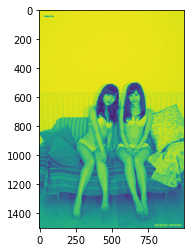

In [4]:
# https://github.com/opencv/opencv/tree/master/data/haarcascades
# https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt.xml
cascade_path="./haarcascade_frontalface_alt.xml"

for i in l:
    result_dir=i.split(".")[0]
    print(result_dir)
    # os.mkdir(Mydribe + "/face/"+result_dir)
    os.makedirs(Mydribe + "/face/"+result_dir, exist_ok=True)

    m=os.listdir(Mydribe + "/origin_image/"+i)
    n=0
    for target_file in m:
        origin_image=(Mydribe + "/origin_image/"+i+"/"+target_file)
        print(origin_image)
        cascade=cv2.CascadeClassifier(cascade_path)
        image=cv2.imread(origin_image)

        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
        plt.imshow(gray)

        facerect=cascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=1,minSize=(10,10))

        for x,y,w,h in facerect:
            face=gray[y:y+h,x:x+w]
            face=cv2.resize(face,(128,128))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.flip(face,1)
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(face,(10,10))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1
            face=cv2.blur(cv2.flip(face,1),(10,10))
            save_path=Mydribe + "/face/"+result_dir+"/image_"+str(n)+".jpg"
            cv2.imwrite(save_path,face)
            n=n+1